In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv('customer_data.csv')

In [3]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   200 non-null    int64 
 1   Year_Birth           200 non-null    int64 
 2   Education            200 non-null    object
 3   Marital_Status       200 non-null    object
 4   Income               200 non-null    int64 
 5   Kidhome              200 non-null    int64 
 6   Teenhome             200 non-null    int64 
 7   Dt_Customer          200 non-null    object
 8   Recency              200 non-null    int64 
 9   MntWines             200 non-null    int64 
 10  MntFruits            200 non-null    int64 
 11  MntMeatProducts      200 non-null    int64 
 12  MntFishProducts      200 non-null    int64 
 13  MntSweetProducts     200 non-null    int64 
 14  MntGoldProds         200 non-null    int64 
 15  NumDealsPurchases    200 non-null    int64 
 16  NumWebPu

In [8]:
df.shape

(200, 29)

In [6]:
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,200.000000,200.000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,...,200.000000,200.000000,200.000000,200.000000,200.000000,200.0,200.000000,200.0,200.0,200.000000
mean,5633.330000,1968.260,53405.395000,0.460000,0.515000,46.860000,321.005000,25.705000,183.475000,38.570000,...,5.280000,0.060000,0.095000,0.060000,0.050000,0.0,0.005000,3.0,11.0,0.150000
std,3270.834831,12.064,22701.597661,0.556731,0.566906,27.962832,333.053054,40.265176,264.816803,56.708326,...,2.486466,0.238083,0.293951,0.238083,0.218492,0.0,0.070711,0.0,0.0,0.357967
min,0.000000,1943.000,2447.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,3.0,11.0,0.000000
25%,2681.500000,1958.000,35842.500000,0.000000,0.000000,24.000000,21.500000,1.000000,16.000000,2.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,3.0,11.0,0.000000
50%,6038.000000,1969.000,53857.500000,0.000000,0.000000,47.000000,222.000000,7.000000,68.000000,11.500000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,3.0,11.0,0.000000
75%,8450.250000,1977.000,69406.000000,1.000000,1.000000,69.000000,524.000000,29.250000,266.750000,46.250000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,3.0,11.0,0.000000
max,11178.000000,1992.000,157243.000000,2.000000,2.000000,99.000000,1349.000000,194.000000,1725.000000,254.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,3.0,11.0,1.000000


In [13]:
df.dropna

<bound method DataFrame.dropna of         ID  Year_Birth   Education Marital_Status  Income  Kidhome  Teenhome  \
0     5524        1957  Graduation         Single   58138        0         0   
1     2174        1954  Graduation         Single   46344        1         1   
2     4141        1965  Graduation       Together   71613        0         0   
3     6182        1984  Graduation       Together   26646        1         0   
4     5324        1981         PhD        Married   58293        1         0   
..     ...         ...         ...            ...     ...      ...       ...   
195   9265        1953  Graduation        Married   75027        0         1   
196   8867        1988         PhD        Married   67546        0         0   
197   8932        1969      Master       Together   65176        0         1   
198  10236        1975      Master         Single   31160        1         0   
199   6340        1985  Graduation         Single   29938        1         0   

    D

In [9]:
df.corr()

C:\Users\astha\AppData\Local\Temp\ipykernel_4252\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
ID,1.000000,-0.000394,0.046597,0.033751,-0.013328,0.010640,0.011661,0.060188,-0.007342,-0.014851,...,-0.045649,-0.071215,-0.037889,-0.044816,-0.051705,NaN,-0.054608,NaN,NaN,0.033610
Year_Birth,-0.000394,1.000000,-0.161470,0.246213,-0.310641,0.107569,-0.189644,0.012935,0.033762,-0.037062,...,0.009958,-0.005459,-0.018336,-0.003709,-0.025927,NaN,0.075048,NaN,NaN,0.009542
Income,0.046597,-0.161470,1.000000,-0.538969,0.076760,-0.019824,0.664848,0.522670,0.573522,0.452672,...,-0.585118,-0.086140,0.191594,0.348479,0.295082,NaN,-0.046513,NaN,NaN,0.173271
Kidhome,0.033751,0.246213,-0.538969,1.000000,0.009871,0.093248,-0.505991,-0.424317,-0.386132,-0.428390,...,0.447374,-0.019714,-0.176254,-0.171361,-0.148720,NaN,0.068930,NaN,NaN,-0.146247
Teenhome,-0.013328,-0.310641,0.076760,0.009871,1.000000,-0.026495,0.014970,-0.147852,-0.208934,-0.268341,...,0.193078,-0.043933,-0.023672,-0.230089,-0.127794,NaN,-0.064559,NaN,NaN,-0.184480
Recency,0.010640,0.107569,-0.019824,0.093248,-0.026495,1.000000,-0.068831,0.018436,0.045081,0.011129,...,0.036704,0.027686,0.043198,0.051840,-0.018588,NaN,0.005439,NaN,NaN,-0.139462
MntWines,0.011661,-0.189644,0.664848,-0.505991,0.014970,-0.068831,1.000000,0.348220,0.424886,0.349817,...,-0.241596,-0.023198,0.296674,0.325734,0.294587,NaN,-0.067215,NaN,NaN,0.275734
MntFruits,0.060188,0.012935,0.522670,-0.424317,-0.147852,0.018436,0.348220,1.000000,0.467258,0.611829,...,-0.422490,0.001856,-0.078712,0.109315,0.206172,NaN,-0.043603,NaN,NaN,0.116393
MntMeatProducts,-0.007342,0.033762,0.573522,-0.386132,-0.208934,0.045081,0.424886,0.467258,1.000000,0.446645,...,-0.524399,-0.009540,-0.042027,0.221837,0.113881,NaN,-0.046554,NaN,NaN,0.137018
MntFishProducts,-0.014851,-0.037062,0.452672,-0.428390,-0.268341,0.011129,0.349817,0.611829,0.446645,1.000000,...,-0.424664,0.082315,-0.057829,0.164198,0.206151,NaN,-0.048335,NaN,NaN,0.196527


C:\Users\astha\AppData\Local\Temp\ipykernel_4252\4152808537.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True)


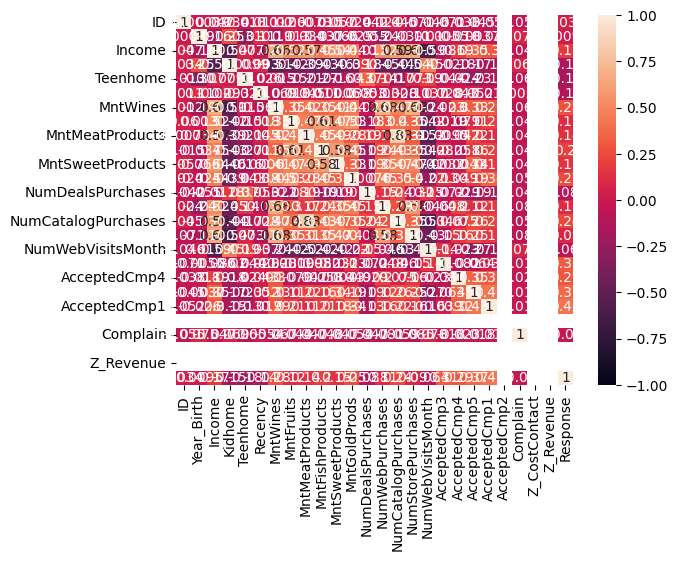

In [15]:
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True)